## Switching in tethered bacteria

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import time
import math

% matplotlib inline

In [24]:
filename = 'omega.txt'
with open(filename) as f:
    data = f.readlines()

In [30]:
data = np.array([float(dd) for dd in data])

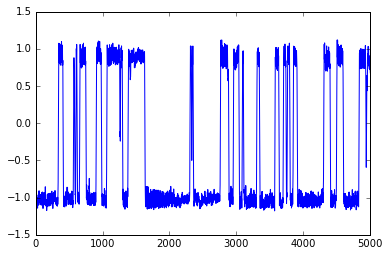

In [36]:
plt.plot(data[:5000])

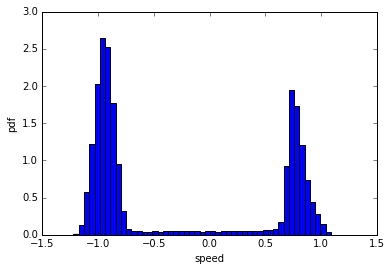

In [35]:
plt.hist(data,normed=True,bins=50)
plt.xlabel('speed')
plt.ylabel('pdf')

In [37]:
#switching time
threshold = 0
binarize = data.copy()
binarize[binarize>=threshold] = 1
binarize[binarize<threshold] = -1

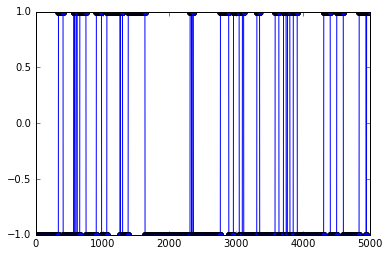

In [41]:
#biniarize
plt.plot(binarize[:5000],'-o')

In [77]:
#find transition
pos = np.where(abs(np.diff(binarize))>0)[0]

In [78]:
#intervals
inter = np.diff(pos)
aa,bb = np.histogram(inter,bins=50);

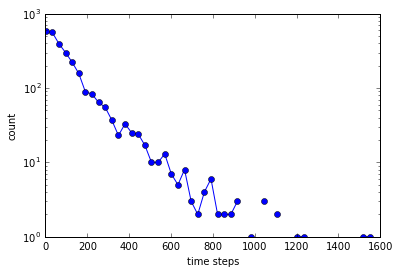

In [79]:
plt.semilogy(bb[:-1],aa,'-o')
plt.xlabel('time steps')
plt.ylabel('count')

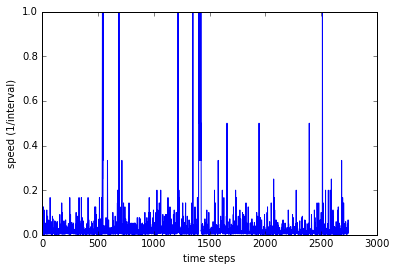

In [83]:
plt.plot(1/inter);
plt.xlabel('time steps')
plt.ylabel('speed (1/interval)')